# Алгоритмы безусловной нелинейной оптимизации. Прямые методы

In [1]:
import random
import math as m
import matplotlib.pyplot as plt
import matplotlib as mpl

## Part 1

1. $f(x)=x^3, \,x\in\left[0,1\right];$
2. $f(x)=|x-0.2|,\, x\in\left[0,1\right];$
3. $f(x) = x\cdot \sin\dfrac{1}{x},\, x\in\left[0.01,1\right].$


In [2]:
eps = 1e-3
step = round(1/eps/100)
accuracy = round(m.log(1/eps, 10))
x_left = 0
x_right = 1
x_one = [round(i * eps, accuracy) for i in range(round((x_right - x_left)/eps))]

In [129]:
def f1(x):
    return x ** 3

def f2(x):
    return abs(x - 0.2)

def f3(x):
    return x * m.sin(1/x)

In [130]:
y1_one = [f1(i) for i in x_one]
y2_one = [f2(i) for i in x_one]
y3_one = [f3(i) for i in x_one[step:]]

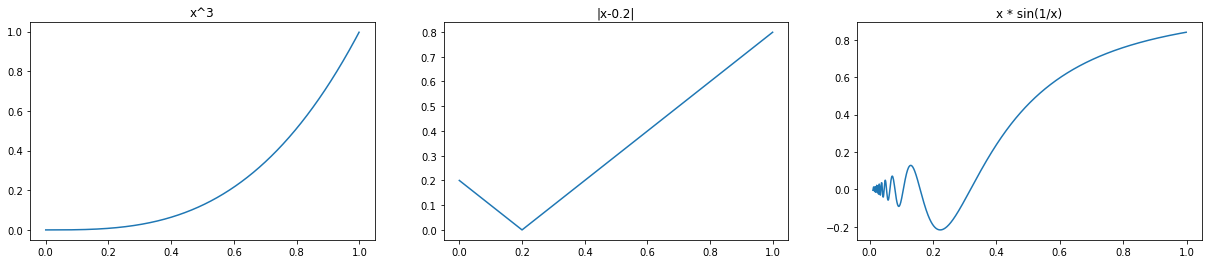

In [131]:
f = plt.figure(figsize=(21,4))
ax = f.add_subplot(131)
ax.set_title('x^3')
ax.plot(x_one, y1_one)

ax2 = f.add_subplot(132)
ax2.plot(x_one, y2_one)
ax2.set_title('|x-0.2|')

ax3 = f.add_subplot(133)
ax3.plot(x_one[step:], y3_one)
ax3.set_title('x * sin(1/x)')

plt.show()

## Одномерные методы перебора

In [132]:
def visualise(method):
    f = plt.figure(figsize=(21,4))

    ax = f.add_subplot(131)
    ax.plot(x_one, y1_one)
    x1 = method(0, 1, eps, f1)
    print(x1)
    ax.scatter(x=x1["x"], y=f1(x1["x"]), c='r') 
    ax.set_title('x^3')

    ax2 = f.add_subplot(132)
    ax2.plot(x_one, y2_one)
    x2 = method(0, 1, eps, f2)
    print(x2)
    ax2.scatter(x=x2["x"], y=f2(x2["x"]), c='r') 
    ax2.set_title('|x-0.2|')

    ax3 = f.add_subplot(133)
    ax3.plot(x_one[step:], y3_one)
    x3 = method(0.1, 1, eps, f3)
    print(x3)
    ax3.scatter(x=x3["x"], y=f3(x3["x"]), c='r') 
    ax3.set_title('x * sin(1/x)')

    plt.show()

### Метод равномерного поиска

In [133]:
def exhaustive_search_one(a, b, eps, func):
    n = round((b - a) / eps)
    min_y = func(a)
    min_x = a
    for i in range(1, n + 1):
        xk = a + i * (b - a) / n
        y = func(xk)
        if y < min_y:
            min_y = y
            min_x = xk
    
    res_dich = {}
    res_dich["x"] = min_x
    res_dich["iterations"] = n + 1
    res_dich["counter"] = n + 1
    return res_dich

{'x': 0, 'iterations': 1001, 'counter': 1001}
{'x': 0.2, 'iterations': 1001, 'counter': 1001}
{'x': 0.223, 'iterations': 901, 'counter': 901}


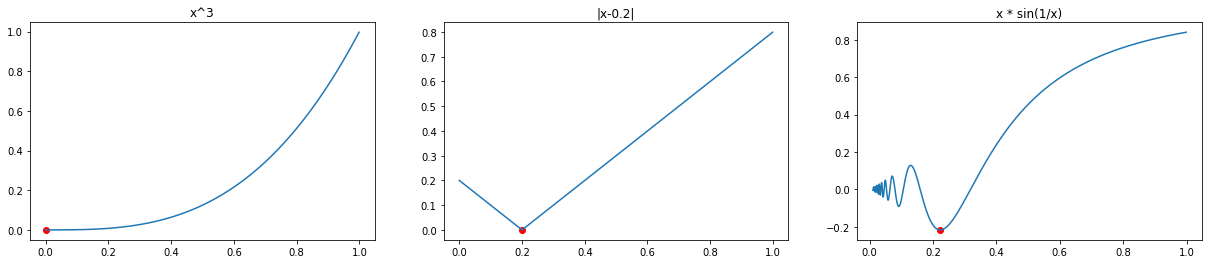

In [134]:
visualise(exhaustive_search_one)    

### Метод дихотомии

$$iter=\dfrac{\ln\left((b_0-a_0)\cdot\varepsilon\right)}{\ln2}$$

In [135]:
def dichotomy(a, b, eps, func):
    right = b
    left = a
    delta = eps / 2
    counter = 0

    while right - left > eps:
        # на каждой итерации функция вычисляется дважды
        counter += 2
        x1 = (left + right) / 2 - delta
        x2 = (left + right) / 2 + delta
        f1 = func(x1)
        f2 = func(x2)
        if f1 > f2:
            left = x1 + delta
        if f1 < f2:
            right = x2 - delta
    # Количество итераций
    iter_dich = m.ceil(m.log((b - a) / eps, m.e) / m.log(2, m.e))
    res_dich = {}
    res_dich["x"] = round((left + right) / 2, accuracy)
    res_dich["iterations"] = round(iter_dich, accuracy)
    res_dich["counter"] = counter
    return res_dich

{'x': 0.0, 'iterations': 10, 'counter': 20}
{'x': 0.2, 'iterations': 10, 'counter': 20}
{'x': 0.223, 'iterations': 10, 'counter': 20}


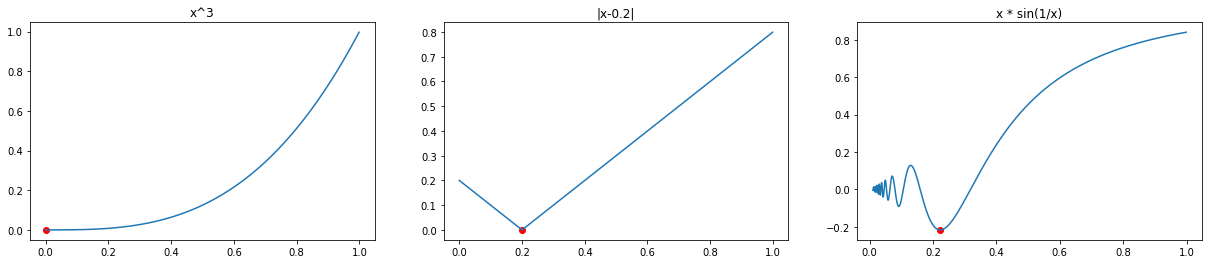

In [136]:
visualise(dichotomy)

### Метод золотого сечения

$$iter=\dfrac{\ln\left((b_0-a_0)/\varepsilon\right)}{\ln1.618}$$

In [ ]:
def golden_ratio(a, b, eps, func):
    right = b
    left = a
    counter = 2
    iter_gold = m.ceil(m.log((b - a) / eps, m.e) / m.log(1.618, m.e))
    psi = (1 + m.sqrt(5)) / 2
    x1 = right - (right - left) / psi
    x2 = left + (right - left) / psi
    f2 = func(x2)
    f1 = func(x1)
    while right - left > eps:
        counter += 1
        if f1 > f2:
            left = x1
            x1 = x2
            x2 = left + (right - left) / psi
            f1 = f2
            f2 = func(x2)
        else:
            right = x2
            x2 = x1
            x1 = right - (right - left) / psi
            f2 = f1
            f1 = func(x1)
    gold_res = {}
    gold_res["x"] = round((left + right) / 2, 3)
    gold_res["iterations"] = round(iter_gold, 3)
    gold_res["counter"] = counter
    return gold_res

In [ ]:
visualise(golden_ratio)

## Part 2

## Многомерные методы перебора

1. $F(x,a,b)=ax+b$ - linear approximant,
2. $F(x,a,b)=\dfrac{a}{1+bx}$ - rational approximant

In [3]:
def linear_approx(a, b, x):
    return a * x + b
    
def rational_approx(a, b, x):
    if 1 + x * b != 0:
        return a/(1 + b * x)
    else:
        return 1000000

In [14]:
alpha = random.random()
beta = random.random()
n = 100
x = [k/n for k in range(n + 1)]
y = [alpha * x[k] + beta + random.normalvariate(0, 1) for k in range(n + 1)]

In [15]:
linear_predict_a_b = {}
rational_predict_a_b = {}

In [105]:
def visualise(predict_a_b, func):
    dpi = 80
    fig = plt.figure(dpi=dpi, figsize=(1024 / dpi, 512 / dpi))
    plt.scatter(x=x, y=y, c='r', label = "data generated") 
    
    for method in predict_a_b.keys():
        print(method, predict_a_b[method])
        y_k = [func(i, predict_a_b[method]["params"][0], predict_a_b[method]["params"][1]) for i in x]
        plt.plot(x, y_k, label=method)
    
    y_k = [alpha * x[k] + beta for k in range(n + 1)]
    plt.plot(x, y_k, label="init line")
    
    plt.title(func.__name__)
    plt.grid(True)
    plt.legend()
    
    fig.set_figwidth(8)
    fig.set_figheight(8)
    plt.show()

### Метод наименьших квадратов

In [17]:
def least_squares(func, a, b):
    d = 0
    for k in range(0, n + 1):
        d += (func(a, b, x[k]) - y[k]) ** 2 
    return d

In [69]:
eps = 1e-3

### Метод перебора

In [101]:
def exhaustive_search_multi(func):
    min_d = 100000000
    min_a = 0
    min_b = 0
    num_eps = round(1/eps)
    num_iter = 0
    for a in range(-2 * num_eps, 2 * (num_eps + 1)):
        for b in range(-2 * num_eps, 2 * (num_eps + 1)):      
            num_iter += 1
            d = least_squares(func, a * eps, b * eps)
            if d < min_d:
                min_d = d
                min_a = round(a * eps, step)
                min_b = round(b * eps, step)
    print(f"d = {round(min_d, step)}, a = {min_a}, b = {min_b}")
    return {
        "params": (min_a, min_b),
        "d": min_d,
        "num_iter": num_iter,
        "num_counter": num_iter
    }

In [103]:
linear_predict_a_b['exhaustive_search'] = exhaustive_search_multi(linear_approx)

d = 118.5069613927, a = 0.568, b = 0.888


In [104]:
rational_predict_a_b['exhaustive_search'] = exhaustive_search_multi(rational_approx)

d = 118.9891357579, a = 0.97, b = -0.326


### Метод Гаусса

In [109]:
def gauss(func, min_a, min_b, min_d=100000, param="a", num_iter=0, num_counter=0):
    start_d = min_d
    num_iter += 1
    num_eps = round(1/eps)
    if param == "a":
        gauss_a = min_a
        for a in range(-num_eps * 2, 2 * (num_eps + 1)):
            num_counter += 1
            d = least_squares(func, a * eps, min_b)
            if d < min_d:
                min_d = d
                gauss_a = a * eps
        if abs(start_d - min_d) <= eps:
            return min_d, gauss_a, min_b, num_iter, num_counter
        else:
            gauss_d, gauss_a, gauss_b, num_iter, num_counter = gauss(func, gauss_a, min_b, min_d=min_d, param="b", num_iter=num_iter, num_counter=num_counter)
    else:
        gauss_b = min_b
        for b in range(-2 * num_eps, 2 * (num_eps + 1)):
            num_counter += 1
            d = least_squares(func, min_a, b * eps)
            if d < min_d:
                min_d = d
                gauss_b = b * eps
        if abs(start_d - min_d) <= eps:
            return min_d, min_a, gauss_b, num_iter, num_counter
        else:
            gauss_d, gauss_a, gauss_b, num_iter, num_counter = gauss(func, min_a, gauss_b, min_d=min_d, param="a", num_iter=num_iter, num_counter=num_counter)
    return gauss_d, gauss_a, gauss_b, num_iter, num_counter          

In [110]:
gauss_linear = (gauss(linear_approx, 1, 1))
linear_predict_a_b['gauss'] = {
        "params": (gauss_linear[1], gauss_linear[2]),
        "d": gauss_linear[0],
        "num_iter": gauss_linear[3],
        "num_counter": gauss_linear[4]
    }

gauss_rational = (gauss(rational_approx, 1, 1)) 
rational_predict_a_b['gauss'] = {
        "params": (gauss_rational[1], gauss_rational[2]),
        "d": gauss_rational[0],
        "num_iter": gauss_rational[3],
        "num_counter": gauss_rational[4]
    }

### Метод Нелдера-Мида

In [111]:
class Vector(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __repr__(self):
        return "({0}, {1})".format(self.a, self.b)

    def __add__(self, other):
        a = self.a + other.a
        b = self.b + other.b
        return Vector(a, b)

    def __sub__(self, other):
        a = self.a - other.a
        b = self.b - other.b
        return Vector(a, b)

    def __rmul__(self, other):
        a = self.a * other
        b = self.b * other
        return Vector(a, b)

    def __truediv__(self, other):
        a = self.a / other
        b = self.b / other
        return Vector(a, b)

    def c(self):
        return (self.a, self.b)
    
def point_dist(v1, v2):
    return m.sqrt((v1.a - v2.a) ** 2 + (v1.b - v2.b) ** 2)

In [115]:
def nelder_mead(func, alpha=1, beta=0.5, gamma=2):
    """
    alpha: reflection
    beta: compression
    gamma: expansion
    """
    v1 = Vector(0, 0)
    v2 = Vector(1.0, 0)
    v3 = Vector(0, 1)
    num_iter = 0
    counter = 0
    while(True):
        num_iter += 1
        adict = {
            v1: least_squares(func, v1.a, v1.b),
            v2: least_squares(func, v2.a, v2.b),
            v3: least_squares(func, v3.a, v3.b)
        }
        counter += 3
        points = sorted(adict.items(), key=lambda x: x[1])
        l = points[0][0]
        g = points[1][0]
        h = points[2][0]
        
        f_points = {
            "l": points[0][1],
            "g": points[1][1],
            "h": points[2][1]
        }
        mid = (g + l)/2

        # reflection
        xr = mid + alpha * (mid - h)
        
        if least_squares(func, xr.a, xr.b) < f_points["g"]:
            counter += 1
            h = xr
        else:
            if least_squares(func, xr.a, xr.b) < f_points["h"]:
                counter += 1
                h = xr
            c = (h + mid)/2
            if least_squares(func, c.a, c.b) < f_points["h"]:
                counter += 1
                h = c
        if least_squares(func, xr.a, xr.b) < f_points["l"]:
            counter += 1
            # expansion
            xe = mid + gamma * (xr - mid)
            if least_squares(func, xe.a, xe.b) < least_squares(func, xr.a, xr.b):
                counter += 2
                h = xe
            else:
                h = xr
        if least_squares(func, xr.a, xr.b) > f_points["g"]:
            counter += 1
            # contraction
            xc = mid + beta * (h - mid)
            if least_squares(func, xc.a, xc.b) < least_squares(func, h.a, h.b):
                counter += 2
                h = xc
        # update points
        v1 = h
        v2 = g
        v3 = l
        if point_dist(v1, v2) < eps and point_dist(v3, v2) < eps and point_dist(v1, v3):
            break
            
    return {
        "params": (round(l.a, step), round(l.b, step)),
        "d": f_points["l"],
        "num_iter": num_iter,
        "num_counter": counter
    }

In [116]:
linear_predict_a_b['nelder_mead'] = nelder_mead(linear_approx)
rational_predict_a_b['nelder_mead'] = nelder_mead(rational_approx)

### Visualise

exhaustive_search {'params': (0.568, 0.888), 'd': 118.50696139274199, 'num_iter': 16016004, 'num_counter': 16016004}
gauss {'params': (0.552, 0.896), 'd': 118.50891633555955, 'num_iter': 18, 'num_counter': 72036}
nelder_mead {'params': (0.5677993828, 0.8881905284), 'd': 118.5069562800813, 'num_iter': 13, 'num_counter': 90}


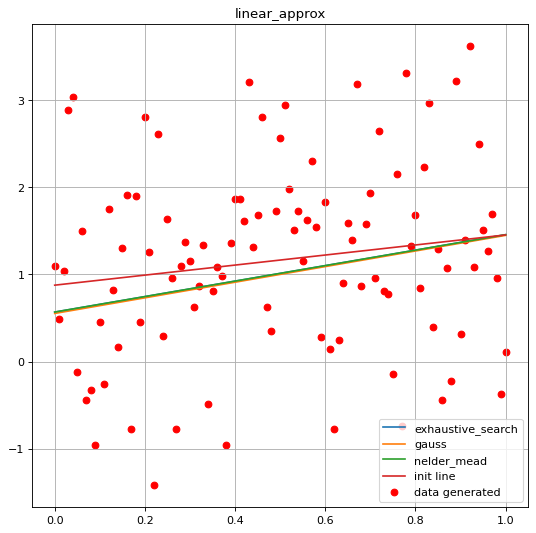

In [124]:
visualise(linear_predict_a_b, linear_approx)

exhaustive_search {'params': (0.97, -0.326), 'd': 118.98913575790809, 'num_iter': 16016004, 'num_counter': 16016004}
gauss {'params': (0.977, -0.319), 'd': 118.99120243991061, 'num_iter': 26, 'num_counter': 104052}
nelder_mead {'params': (0.9709574949, -0.3246818525), 'd': 118.98915397236638, 'num_iter': 32, 'num_counter': 197}


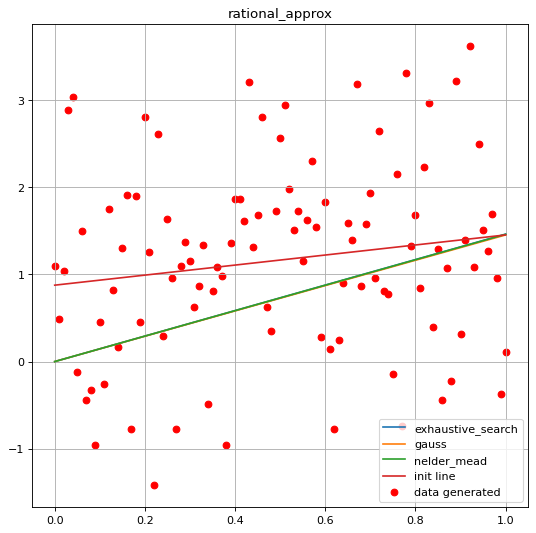

In [128]:
visualise(rational_predict_a_b, rational_approx)